In [18]:
#######

## import packages
import subprocess
import os
import pandas as pd

import itertools
import glob
import numpy as np
import sklearn

In [19]:
data_for_modellingV3 = pd.read_csv('/home/maeve/svm_testing/testrepo/modelling_data.csv')

In [3]:
import sklearn.model_selection
samplelist = data_for_modellingV3["recNumsR"].unique()
training_samp, test_samp = sklearn.model_selection.train_test_split(samplelist, train_size=0.8, test_size=0.2, random_state=5, shuffle=True)

training_data = data_for_modellingV3[data_for_modellingV3['recNumsR'].isin(training_samp)]
test_data = data_for_modellingV3[data_for_modellingV3['recNumsR'].isin(test_samp)]

In [4]:
totalLength = len(data_for_modellingV3)
trainingLength = len(training_data)
print('training rows', trainingLength)
testgLength = len(test_data)
print('test rows', testgLength)
print('split training: ', round(trainingLength/totalLength,2), 'vs test: ', round(testgLength/totalLength,2))

training rows 586014
test rows 183750
split training:  0.76 vs test:  0.24


In [5]:
features_to_keep = ['RR_capped', 'normalised_RRTime', 'normalised_RPeakAmp','rmssdNorm_capped', 'mawsdNorm_capped', 'meanHR', 'turningPointRatio',
       'hrTurningRatio', 'hrRange_capped','petrenasAFScore','solosenkoAFScore']

# create training data and test data and remove record numbers from feature list
X_train, X_test, y_train, y_test = training_data[features_to_keep], test_data[features_to_keep], training_data['target_variable'], test_data['target_variable']


In [6]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

steps = [('scaler', StandardScaler()), ('SVM', SVC())]
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps) # define the pipeline object.

parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)


In [20]:

reg_svc = SVC()
reg_svc.fit(X_train, y_train)
y_pred = reg_svc.predict(X_test)

In [9]:
import pickle

In [21]:
# save the classifier
with open('my_dumped_classifier.pkl', 'wb') as fid:
    pickle.dump(reg_svc, fid)    

# load it again
#with open('my_dumped_classifier.pkl', 'rb') as fid:
#    gnb_loaded = cPickle.load(fid)


In [22]:
from sklearn import metrics

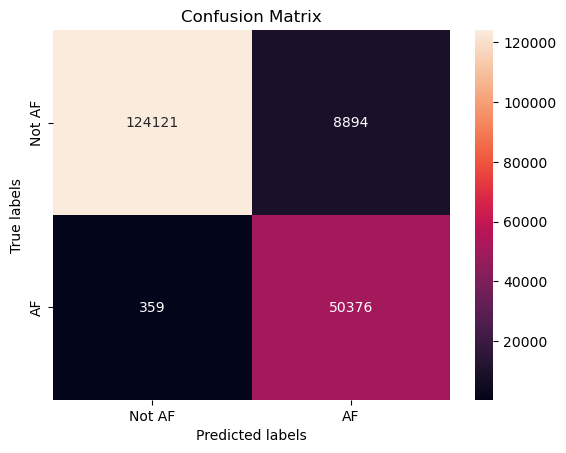

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt     

cm = metrics.confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not AF', 'AF']); ax.yaxis.set_ticklabels(['Not AF', 'AF']);


In [24]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred).ravel()
sensitivity = round((TP/(TP+FN))*100,4)
specificity = round((TN/(FP+TN))*100,4)
ppv = round((TP/(TP+FP))*100,4)
print('Sensitivity: ', sensitivity, ', Specificity: ' ,specificity,', PPV: ' ,specificity)

Sensitivity:  99.2924 , Specificity:  93.3135 , PPV:  93.3135


In [25]:
from sklearn.neighbors import KNeighborsClassifier
reg_knn = KNeighborsClassifier()
reg_knn.fit(X_train, y_train)
y_pred_knn = reg_knn.predict(X_test)

/home/maeve/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


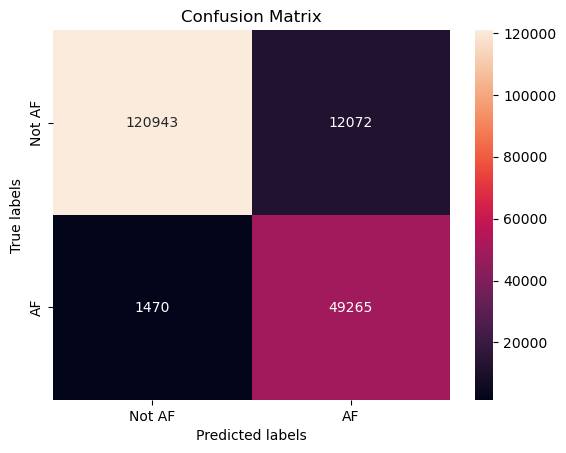

In [26]:
cm = metrics.confusion_matrix(y_test, y_pred_knn)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not AF', 'AF']); ax.yaxis.set_ticklabels(['Not AF', 'AF']);


In [28]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred_knn).ravel()
sensitivity = round((TP/(TP+FN))*100,4)
specificity = round((TN/(FP+TN))*100,4)
ppv = round((TP/(TP+FP))*100,4)
print('Sensitivity: ', sensitivity, ', Specificity: ' ,specificity,', PPV: ' ,specificity)

Sensitivity:  97.1026 , Specificity:  90.9243 , PPV:  90.9243


In [29]:
from sklearn.ensemble import RandomForestClassifier
reg_rf = RandomForestClassifier()
reg_rf.fit(X_train, y_train)
y_pred_rf = reg_rf.predict(X_test)

In [30]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred_rf).ravel()
sensitivity = round((TP/(TP+FN))*100,4)
specificity = round((TN/(FP+TN))*100,4)
ppv = round((TP/(TP+FP))*100,4)
print('Sensitivity: ', sensitivity, ', Specificity: ' ,specificity,', PPV: ' ,specificity)

Sensitivity:  99.387 , Specificity:  98.4348 , PPV:  98.4348


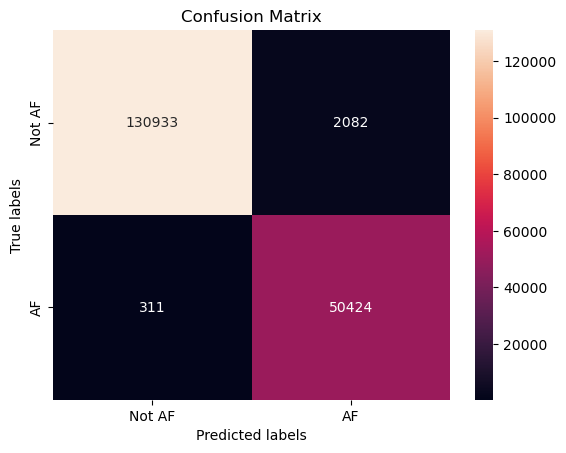

In [31]:
cm = metrics.confusion_matrix(y_test, y_pred_rf)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not AF', 'AF']); ax.yaxis.set_ticklabels(['Not AF', 'AF']);


In [32]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
y_pred_gbm = clf.predict(X_test)

In [33]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred_gbm).ravel()
sensitivity = round((TP/(TP+FN))*100,4)
specificity = round((TN/(FP+TN))*100,4)
ppv = round((TP/(TP+FP))*100,4)
print('Sensitivity: ', sensitivity, ', Specificity: ' ,specificity,', PPV: ' ,specificity)

Sensitivity:  99.4599 , Specificity:  98.3912 , PPV:  98.3912


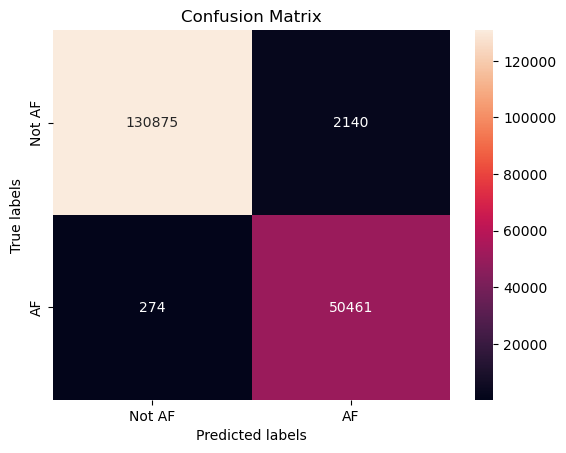

In [34]:
cm = metrics.confusion_matrix(y_test, y_pred_gbm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not AF', 'AF']); ax.yaxis.set_ticklabels(['Not AF', 'AF']);
